# Regression Analyse

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

import mysql.connector
from sqlalchemy import create_engine, exc

from time import gmtime, strftime

In [3]:
# Settings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Seaborn
sns.set()
sns.set_style("darkgrid")
plt.matplotlib.style.use('default')

my_colors = ["windows blue", "saffron", "hot pink", "algae green", "dusty purple", "greyish", "petrol", "denim blue", "lime"]
sns.set_palette(sns.xkcd_palette(my_colors))
colors = sns.xkcd_palette(my_colors)

# Warnings
warnings.filterwarnings("ignore")

In [7]:
def my_df_summary(data):
    '''function for the summary'''
    try:
        dat = data.copy()
        df = pd.DataFrame([dat.min(), dat.max(), dat.mean(), dat.std(), dat.isna().sum(), dat.nunique(), dat.dtypes],
                     index=['Minimum', 'Maximum', 'Mean', 'Stand. Dev.','#NA', '#Uniques', 'dtypes'])
        print(f'Dataset has {len(data)} rows.')
        return df
    except:
        print('No summary!!')
        return data  

In [5]:
df = pd.read_csv('data/Werbungseffekte.csv')
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
my_df_summary(df)

Dataset has 200 rows.


,ID,TV,Radio,Newspaper,Sales
Minimum,1,0.7,0,0.3,1.6
Maximum,200,296.4,49.6,114,27
Mean,100.5,147.042,23.264,30.554,14.0225
Stand. Dev.,57.8792,85.8542,14.8468,21.7786,5.21746
#NA,0,0,0,0,0
#Uniques,200,190,167,172,121
dtypes,int64,float64,float64,float64,float64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
df.describe()

,ID,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Understanding Data

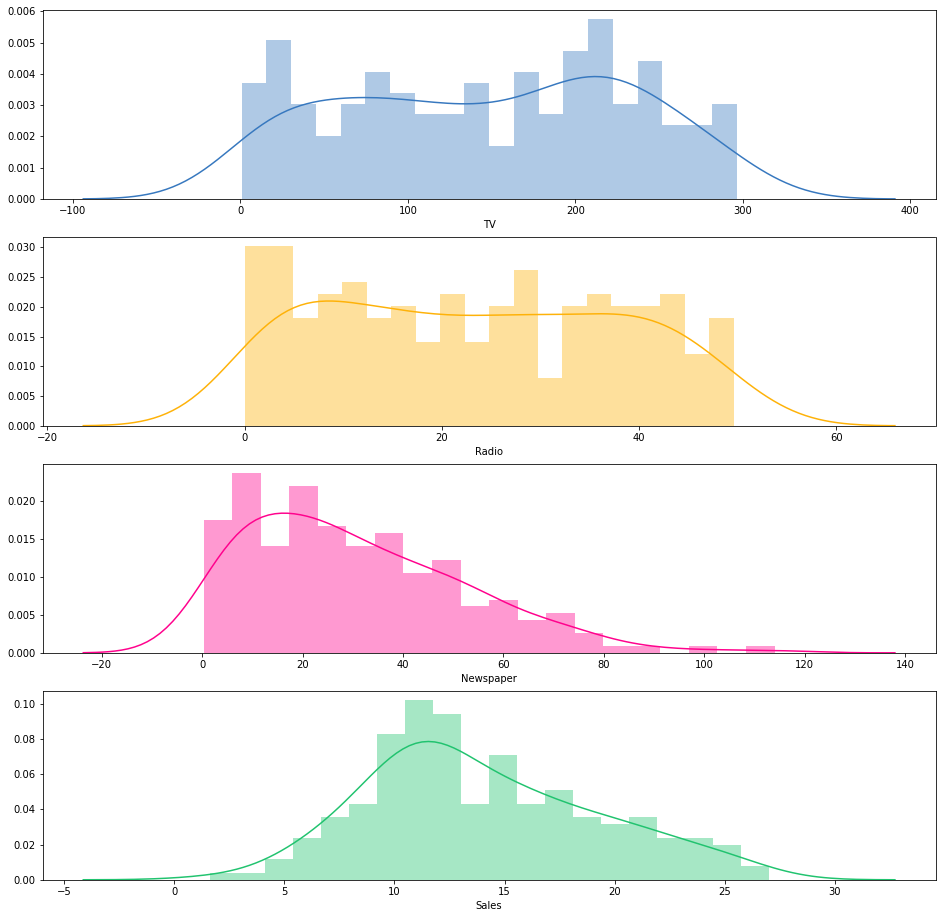

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 16]
fig, axs = plt.subplots(4, 1)
sns.distplot(df.iloc[:,1], color=colors[0], ax=axs[0], bins=20)
sns.distplot(df.iloc[:,2], color=colors[1], ax=axs[1], bins=20)
sns.distplot(df.iloc[:,3], color=colors[2], ax=axs[2], bins=20)
sns.distplot(df.iloc[:,4], color=colors[3], ax=axs[3], bins=20)
plt.show()

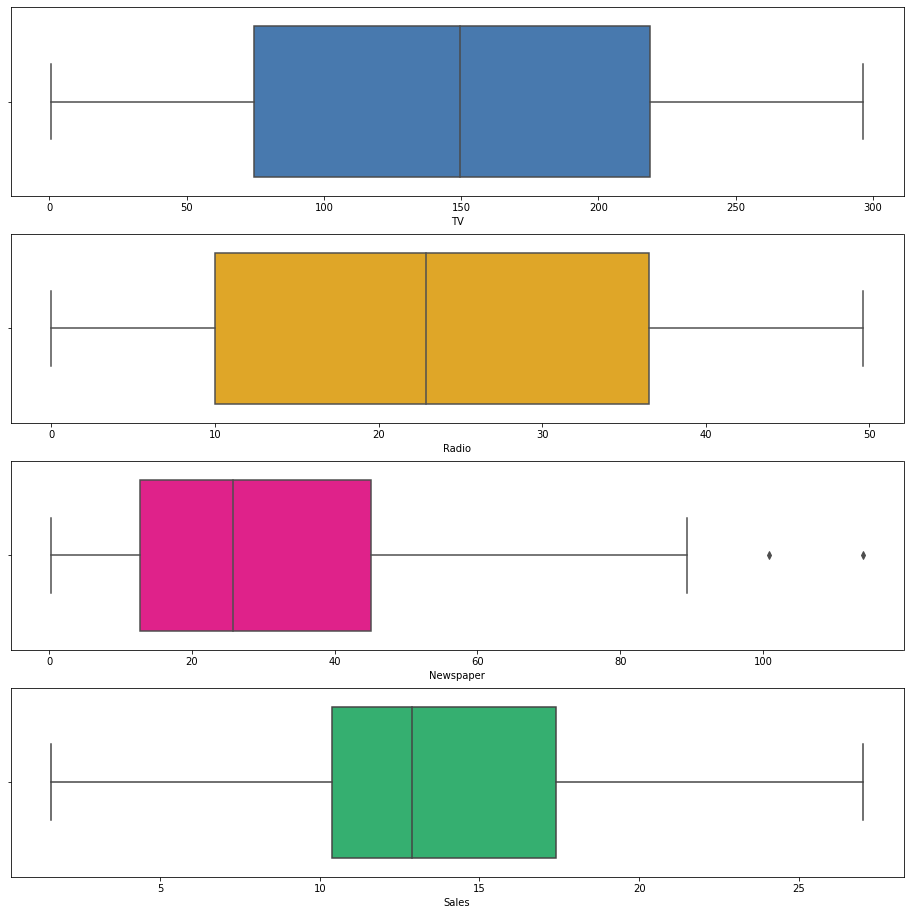

In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 16]
fig, axs = plt.subplots(4, 1)
sns.boxplot(df.iloc[:,1], color=colors[0], ax=axs[0])
sns.boxplot(df.iloc[:,2], color=colors[1], ax=axs[1])
sns.boxplot(df.iloc[:,3], color=colors[2], ax=axs[2])
sns.boxplot(df.iloc[:,4], color=colors[3], ax=axs[3])
plt.show()

## Exploring Sales data

### 1. Linear Correlation

In [13]:
df.iloc[:,1:].corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


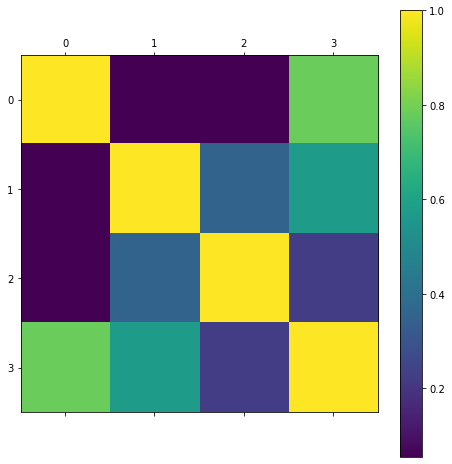

In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]
plt.matshow(df.iloc[:,1:].corr())
plt.colorbar()
plt.show()

## 2. Regression Analyse

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


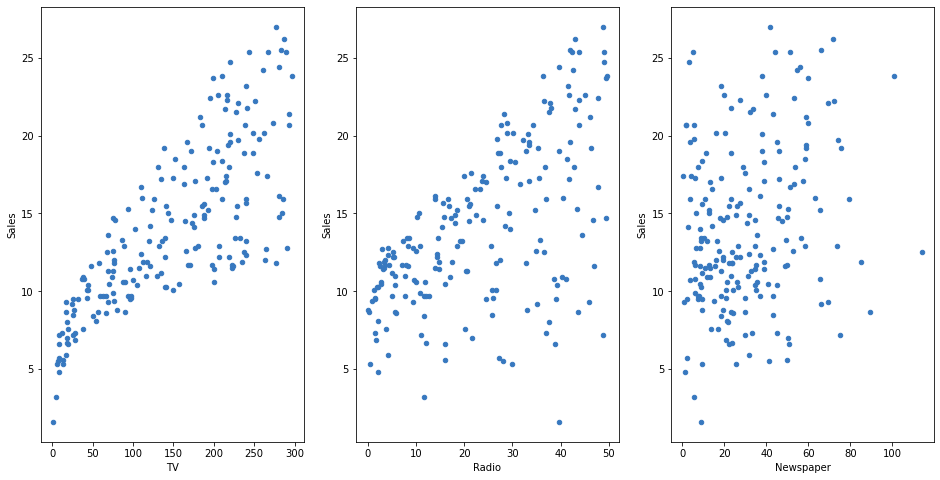

In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]
fig, axs = plt.subplots(1, 3)
df.plot(kind='scatter', x='TV', y='Sales', ax=axs[0])
df.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
df.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
plt.show()

## Einfache lineare Regression (häufig auch einfach OLS-Regression)
<font size = 3><br>
Mit einer einfachen linearen Regression misst man den direkten, linearen Zusammenhang (häufig engl. Response) zwischen zwei Werten.

Gleichung: $y = \beta_0 + \beta_1x$

- $y$ ist die zu erklärende Größe (Response-Value)
- $x$ ist die erklärende Größe (häufig engl. Feature)
- $\beta_0$ ist der geschätzte Achsenabschnitt
- $\beta_1$ ist der geschätzte lineare Wirkzusammenhang (Steigung der Geraden)

$\beta_0$ und $\beta_1$ zusammen nennt man **Koeffizienten**.
</font>

<img src='OLS.png'>

## Berechnung der Koeffizienten
<font size = 3>

<br> Schätzfunktion: $y = \hat{\beta}_0 + \hat{\beta}_{1x} + \epsilon$ <br>

Die optimalen Werte für $\beta_0$ und $\beta_1$ werden für eine OLS-Regression so berechnet: <br>

### Root Mean Squared Error - RMSE
<font size="4">
Tipp: https://de.wikipedia.org/wiki/Lineare_Regression<br>


\begin{align}
\hat{\beta}_1   \; &=  \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2}      
\end{align} <br>

\begin{align*}
\hat{\beta}_0   \; &=  \bar{Y} - \hat{\beta}_1 \bar{X}
\end{align*} <br>

D.h., der Steigungs-Koeffizient ($\beta_1$) lässt sich direkt als Cov(X,Y)/Var(X) berechnen.

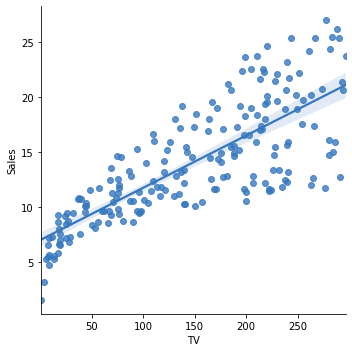

In [13]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]
g = sns.lmplot(x="TV", y="Sales", data=df)
plt.show()

In [14]:
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
# Coefficients on Statsmodel
import statsmodels.formula.api as smf
# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=df).fit()

In [16]:
dir(lm)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',

In [17]:
# summary function
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.47e-42
Time:                        11:43:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Wie lese ich die Ergebnisse einer OLS-Regression?
<font size = 3><br>
To check whether a regression has good explanatory power at all, we should look at the following key-features:<br>
1. Determination coefficient adj. R-squared<br>
2. The estimation statistics of all coefficients<br>
3. Jarque-Bera-Test<br>
4. Durbin-Watson-Test<br>

Only when these values have the desired properties we should go further with the actual coefficients


### Analyse the Rest

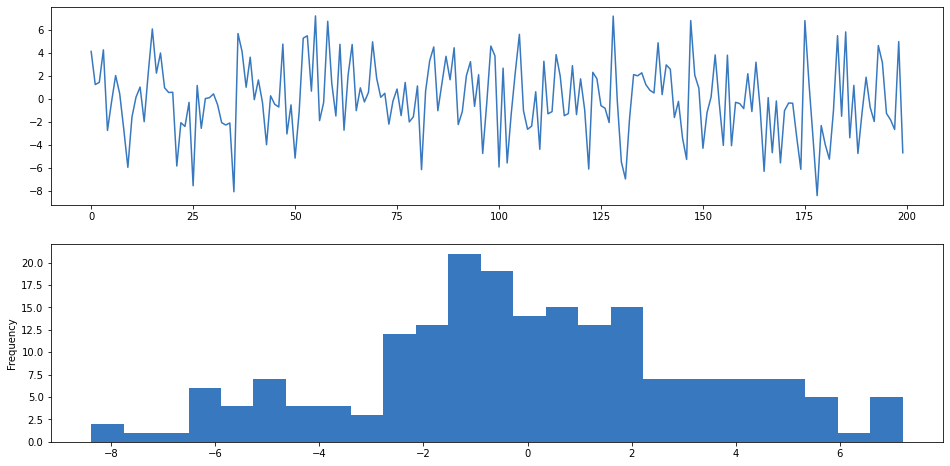

In [18]:
# The residuals are also directly ejected by the statsmodel

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]
fig, axs = plt.subplots(2, 1)
lm.resid.plot(ax=axs[0])
lm.resid.plot(kind='hist', bins=25, ax=axs[1])
plt.show()

### Once we have estimated the model, we can also use it to explain Y with new x values.

In [19]:
# Important: predict expects the values with the same labels as data with which estimates were made.

X_neu = pd.DataFrame({'TV': [100, 200, 300]})
pred = lm.predict(X_neu)
pred

0    11.786258
1    16.539922
2    21.293586
dtype: float64

### The quality of an estimate can also be made again with training and test data. With an OLS model, however, this is only very rarely necessary due to the large number of estimation statistics.

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [21]:
lm = smf.ols(formula='Sales ~ TV', data=train).fit()

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     222.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           5.33e-32
Time:                        11:56:55   Log-Likelihood:                -417.26
No. Observations:                 160   AIC:                             838.5
Df Residuals:                     158   BIC:                             844.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3339      0.535     13.702      0.000       6.277       8.391
TV             0.0461      0.003     14.930      0.000       0.040       0.052
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.620
Skew:                          -0.097   Prob(JB):                        0.733
Kurtosis:                       2.765   Cond. No.                         355.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
y_hat = lm.predict(test)
y_hat.head()

192     8.126934
108     7.937909
80     10.856274
23     17.859427
139    15.858526
dtype: float64

In [24]:
# Error estimation over sklearn
from sklearn.metrics import mean_squared_error
from math import sqrt

In [25]:
rmse = sqrt(mean_squared_error(test.Sales, y_hat))
me = (test.Sales - y_hat).sum() / len(test)
print('ME: {0:.4f}, RMSE: {1:.4f}.'.format(me,rmse))

ME: -0.4533, RMSE: 3.0903.


## Multivariate lineare Regression
<font size = 3><br>
Das Schätzverfahren lässt sich (theoretisch) beliebig erweitern. Sobald wir y mit mehr als einer Variablen erklären wollen, schätzen wir eine **Multivariatie Regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$ <br>

<br> Jedes $x$ ist ein eigenes "Feature" und hat dementsprechend einen eigenen Koeffizienten:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$


In [26]:
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [27]:
# Estimation
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df).fit()

# Coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.58e-96
Time:                        11:59:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

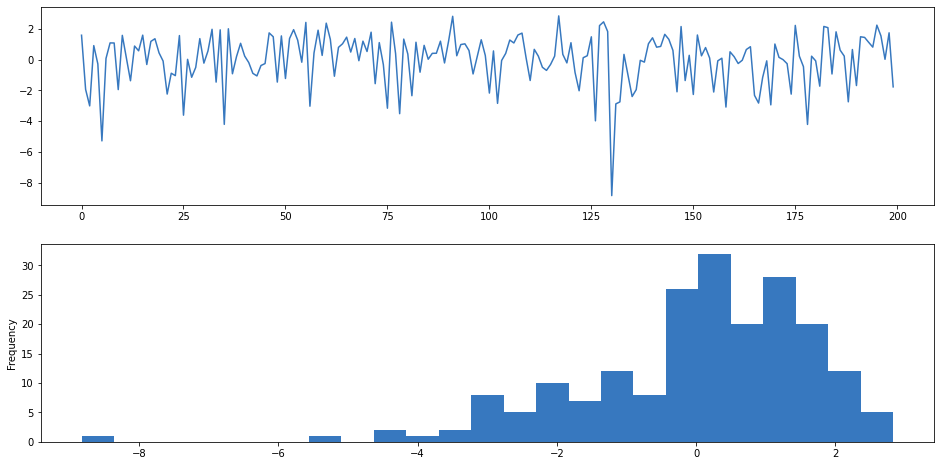

In [29]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]
fig, axs = plt.subplots(2, 1)
lm.resid.plot(ax=axs[0])
lm.resid.plot(kind='hist', bins=25, ax=axs[1])
plt.show()

### The estimate is already better (has a higher adj. R-squared), but it also has significantly more noticeable (not normally distributed) residuals, so we should remove the insignificant feature.

In [30]:
lm = smf.ols(formula='Sales ~ TV + Radio', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           4.83e-98
Time:                        12:03:07   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

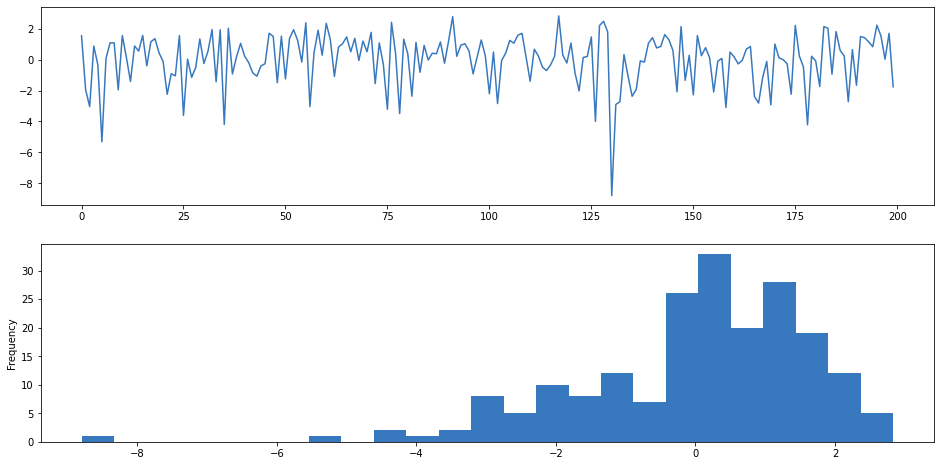

In [31]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]
fig, axs = plt.subplots(2, 1)
lm.resid.plot(ax=axs[0])
lm.resid.plot(kind='hist', bins=25, ax=axs[1])
plt.show()

### Logarithmic relationships can also be measured

In [32]:
lm = smf.ols(formula='np.log(Sales) ~ np.log(TV) + np.log(Radio + 0.00000001)', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Sales)   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     458.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           7.84e-75
Time:                        12:04:07   Log-Likelihood:                 66.155
No. Observations:                 200   AIC:                            -126.3
Df Residuals:                     197   BIC:                            -116.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.7467      0.061     12.177      0.000       0.626       0.868
np.log(TV)                     0.3516      0.012     28.456      0.000       0.327       0.376
np.log(Radio + 0.00000001)     0.0649      0.007      9.498      0.000       0.051       0.078
==============================================================================
Omnibus:                       65.501   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.943
Skew:                           1.138   Prob(JB):                     2.51e-74
Kurtosis:                       8.958   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
lm.resid

0      0.201211
1      0.022522
2      0.234834
3      0.164581
4     -0.171073
5      0.214404
6      0.070447
7     -0.043245
8      0.017286
9     -0.310161
10    -0.182454
11     0.015936
12     0.127256
13    -0.216273
14     0.101235
15     0.257064
16     0.063035
17     0.226443
18    -0.007461
19    -0.026788
20     0.034526
21    -0.249626
22    -0.110562
23    -0.098525
24    -0.091624
25    -0.301884
26    -0.002318
27    -0.089989
28     0.038922
29    -0.071846
30     0.102973
31    -0.117171
32    -0.120246
33    -0.047025
34    -0.120773
35    -0.282951
36     0.278665
37     0.171619
38     0.029575
39     0.177081
40    -0.005798
41     0.044977
42     0.070267
43    -0.202168
44     0.049652
45    -0.063309
46    -0.115390
47     0.229063
48    -0.138672
49    -0.111859
50    -0.248816
51    -0.143620
52     0.238791
53     0.227896
54     0.082383
55     0.304965
56     0.042704
57    -0.085839
58     0.288485
59     0.065037
60    -0.098907
61     0.239374
62    -0

## What can we do if we have text or category information?

In [34]:
np.random.seed(12345)
nums = np.random.rand(len(df))
mask_large = nums > 0.5

df['Size'] = 'small'
df.loc[mask_large, 'Size'] = 'large'
df.head()

,ID,TV,Radio,Newspaper,Sales,Size
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large


### The easiest way is to simply convert the categories into dummy variables (variables that can take 0 and 1).

In [35]:
df['IsLarge'] = df.Size.map({'small':0, 'large':1})
df.head()

,ID,TV,Radio,Newspaper,Sales,Size,IsLarge
0,1,230.1,37.8,69.2,22.1,large,1
1,2,44.5,39.3,45.1,10.4,small,0
2,3,17.2,45.9,69.3,9.3,small,0
3,4,151.5,41.3,58.5,18.5,small,0
4,5,180.8,10.8,58.4,12.9,large,1


### Dummy variables can easily be included in the prediction.
#### ATTENTION: In this case, the dummy variable was created randomly and has no meaning. This is for demonstration purposes only.

In [36]:
lm = smf.ols(formula='Sales ~ TV + Radio + IsLarge', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           1.56e-96
Time:                        12:07:46   Log-Likelihood:                -386.17
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8938      0.318      9.092      0.000       2.266       3.522
TV             0.0457      0.001     32.493      0.000       0.043       0.048
Radio          0.1882      0.008     23.258      0.000       0.172       0.204
IsLarge        0.0555      0.242      0.229      0.819      -0.422       0.533
==============================================================================
Omnibus:                       59.724   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.220
Skew:                          -1.319   Prob(JB):                     1.08e-32
Kurtosis:                       6.272   Cond. No.                         490.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### If there are many different text values in a column, we can easily create dummy variables with the "OneHotEncoder" from the sklearn module.

In [37]:
from sklearn import preprocessing

In [38]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
my_df_summary(df_titanic)

Dataset has 891 rows.


,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone,embarked,deck,embark_town
Minimum,0,1,female,0.42,0,0,0,First,child,False,no,False,NaN,NaN,NaN
Maximum,1,3,male,80,8,6,512.329,Third,woman,True,yes,True,NaN,NaN,NaN
Mean,0.383838,2.30864,NaN,29.6991,0.523008,0.381594,32.2042,NaN,NaN,0.602694,NaN,0.602694,NaN,NaN,NaN
Stand. Dev.,0.486592,0.836071,NaN,14.5265,1.10274,0.806057,49.6934,NaN,NaN,0.489615,NaN,0.489615,NaN,NaN,NaN
#NA,0,0,0,177,0,0,0,0,0,0,0,0,2,688,2
#Uniques,2,3,2,88,7,7,248,3,3,2,2,2,3,7,3
dtypes,int64,int64,object,float64,int64,int64,float64,category,object,bool,object,bool,object,category,object


In [40]:
df_text = df_titanic[['class']].dropna()
my_df_summary(df_text)

Dataset has 891 rows.


,class
Minimum,First
Maximum,Third
Mean,NaN
Stand. Dev.,NaN
#NA,0
#Uniques,3
dtypes,category


### Text-Encoder

In [41]:
enc = preprocessing.OneHotEncoder()

In [42]:
enc.fit(df_text)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [43]:
onehotlabels = enc.transform(df_text).toarray()
df_dummys = pd.DataFrame(onehotlabels)
df_dummys.sum(axis=1).describe()

count    891.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
dtype: float64

In [44]:
dir(enc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_X',
 '_compute_drop_idx',
 '_fit',
 '_get_feature',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_transform',
 '_validate_keywords',
 'categories',
 'categories_',
 'drop',
 'drop_idx_',
 'dtype',
 'fit',
 'fit_transform',
 'get_feature_names',
 'get_params',
 'handle_unknown',
 'inverse_transform',
 'set_params',
 'sparse',
 'transform']

### Sometimes (NOT WITH LINEAR REGRESSION) it can also be helpful not to label in dummies, but simply in numerical values. This is very easy with the label encoder.

In [45]:
le = preprocessing.LabelEncoder()

In [46]:
df_labels = df_text.apply(le.fit_transform)
df_labels.head()

,class
0,2
1,0
2,2
3,0
4,2
